In [39]:
#加载txt
import numpy as np
import matplotlib.pyplot as plt
# 解决中文显示问题
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

f=open('../class1/prices.txt','r')
#f转换为两列
data=np.loadtxt(f,delimiter=',')
f.close()
print(data.shape)

(44, 2)


In [46]:
#线性回归
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
#建立模型
model=Pipeline([('poly',PolynomialFeatures(degree=5)),('linear',LinearRegression(fit_intercept=False))])
#训练模型
model=model.fit(data[:,0,np.newaxis],data[:,1])
#预测
x=np.arange(data[:,0].min(),data[:,0].max())[:,np.newaxis]
y=model.predict(x)





In [47]:
#用均方根误差
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(data[:,1], model.predict(data[:,0,np.newaxis])))
print(rms)

74.17340360674098


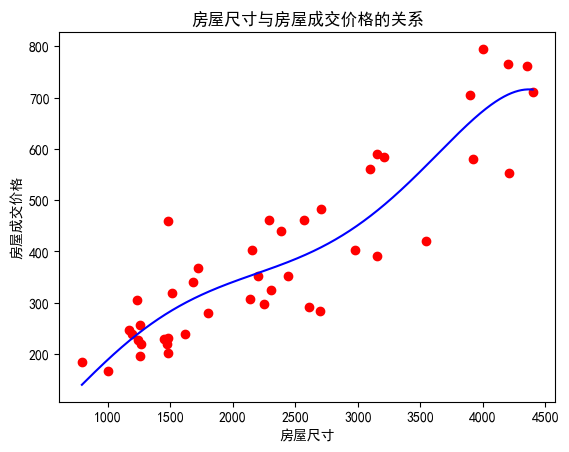

In [38]:
#画图
plt.scatter(data[:,0],data[:,1],c='r')
plt.plot(x,y,c='b')
plt.xlabel('房屋尺寸')
plt.ylabel('房屋成交价格')
plt.title('房屋尺寸与房屋成交价格的关系')
plt.show()